In [1]:
%matplotlib inline
import glob
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

In [2]:
infiles = glob.glob('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6861D_long/raw_displacement_data/*raw_displacement_data.fits')

dx_array = np.zeros((49*49, len(infiles)))
dy_array = np.zeros((49*49, len(infiles)))
dxx_array = np.zeros((49*49, len(infiles)))
dyy_array = np.zeros((49*49, len(infiles)))
x_array = np.zeros((49*49, len(infiles)))
y_array = np.zeros((49*49, len(infiles)))

In [3]:
for i, infile in enumerate(infiles):
    
    with fits.open(infiles[i]) as hdul:
        
        dx_array[:, i] = hdul[1].data['DATA_DX']
        dy_array[:, i] = hdul[1].data['DATA_DY']
        dxx_array[:, i] = hdul[1].data['DATA_XX']
        dyy_array[:, i] = hdul[1].data['DATA_YY']
        x_array[:, i] = hdul[1].data['MODEL_X']
        y_array[:, i] = hdul[1].data['MODEL_Y']

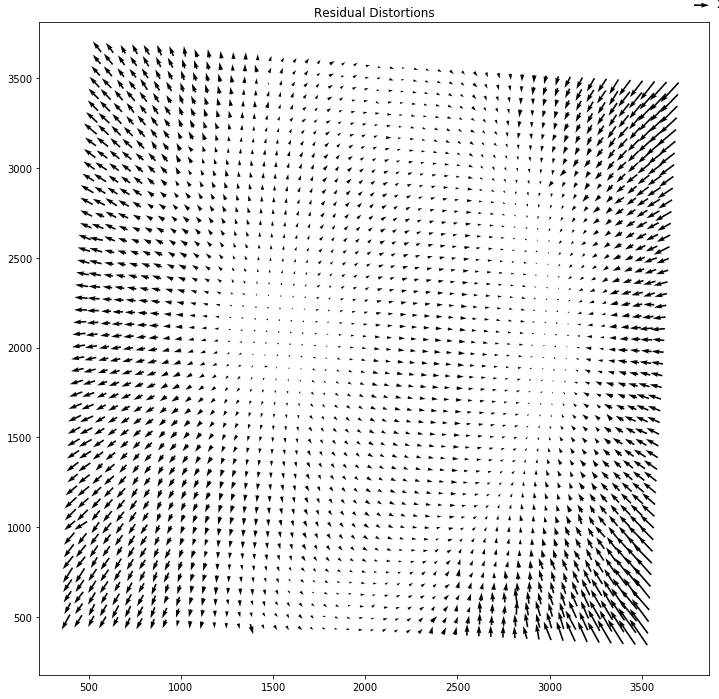

In [5]:
DX = np.nanmean(dx_array, axis=1)
DY = np.nanmean(dy_array, axis=1)
X = x_array[:, 5]
Y = y_array[:, 5]

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.set_title('Residual Distortions')
Q = ax.quiver(X, Y, DX, DY)
qk =ax.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')

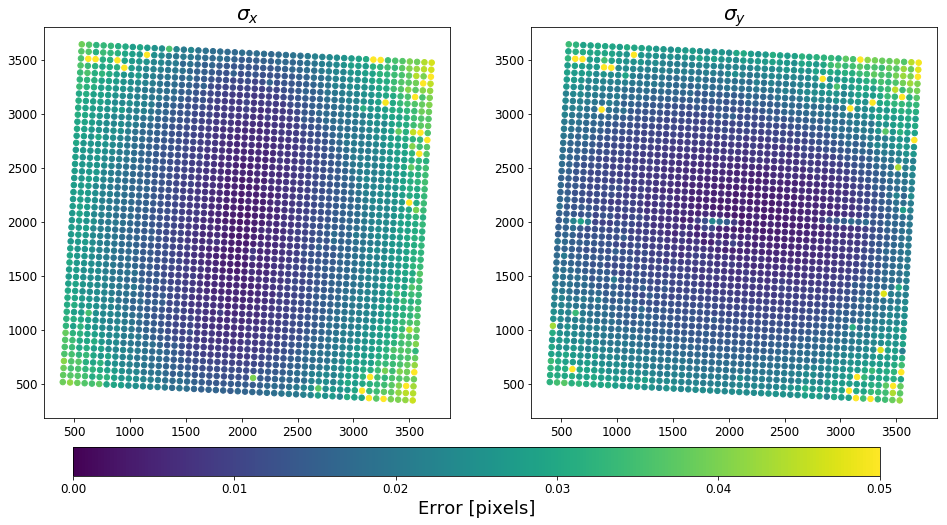

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
im0 = axes[0].scatter(X, Y, c = np.nanstd(dx_array, axis=1), s = 30, marker='o', vmin=0.0, vmax=0.05)
im1 = axes[1].scatter(X, Y, c = np.nanstd(dy_array, axis=1), s = 30, marker='o', vmin=0.0, vmax=0.05)

axes[0].set_title(r'$\sigma_x$', fontsize=20)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[1].set_title(r'$\sigma_y$', fontsize=20)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.15, 0.1, 0.7, 0.05])
cbar = fig.colorbar(im0, cax=cbar_ax, orientation='horizontal')
cbar.set_label(r'Error [pixels]', fontsize=18)
cbar.ax.tick_params(labelsize=12)
plt.savefig('spot_grid_astrometric_error.png')

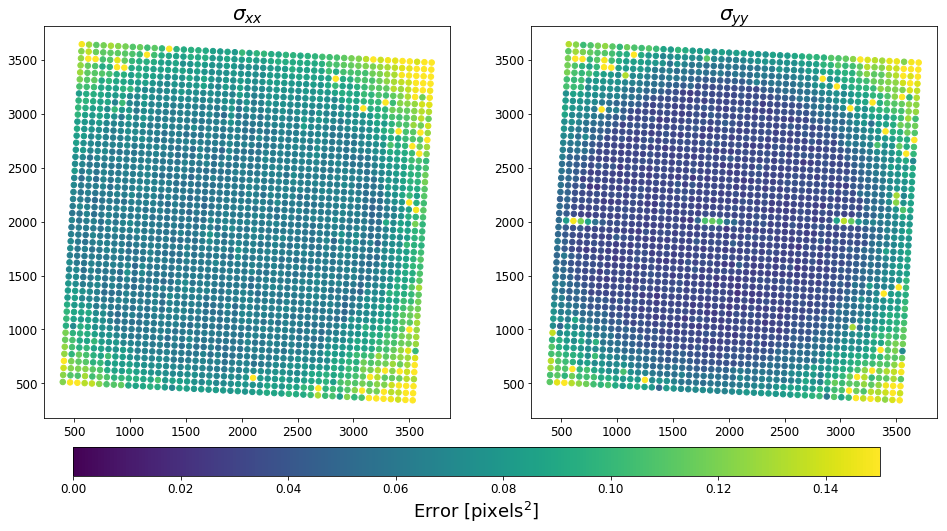

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
im0 = axes[0].scatter(X, Y, c = np.nanstd(dxx_array, axis=1), s = 30, marker='o', vmin=0.0, vmax=0.15)
im1 = axes[1].scatter(X, Y, c = np.nanstd(dyy_array, axis=1), s = 30, marker='o', vmin=0.0, vmax=0.15)

axes[0].set_title(r'$\sigma_{xx}$', fontsize=20)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[1].set_title(r'$\sigma_{yy}$', fontsize=20)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.15, 0.1, 0.7, 0.05])
cbar = fig.colorbar(im0, cax=cbar_ax, orientation='horizontal')
cbar.set_label(r'Error [$\mathrm{pixels}^2$]', fontsize=18)
cbar.ax.tick_params(labelsize=12)
plt.savefig('spot_grid_moments_error.png')